In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

In [386]:
#1
if __name__ == '__main__':

    # Load Data
    df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv')
    #df.info()
    
    df_new = df.sort_values(['submission_date'],ascending = False, inplace = True)
    df_new = df["submission_date"].max()
    #df.submission_date.head()
    df_new = df.drop_duplicates(subset=['state']) #instance with dropped duplicates states
    
    #df_new.info()
    #df_new.state.head(60)
    

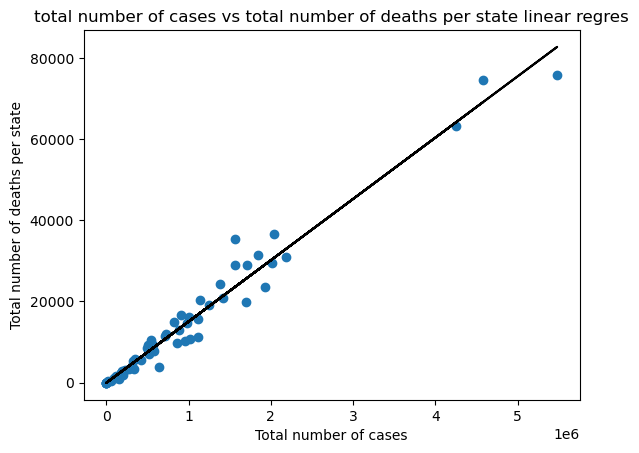

In [387]:
#2,A #linear regression

m,b = np.polyfit(df_new.tot_cases,df_new.tot_death,deg=1)
z = [float(entry)*m+b for entry in df_new.tot_cases]
    
#plotting
plt.plot(df_new.tot_cases,z,color='black')
    
#plot total number of cases vs total number of deaths per state
plt.scatter(df_new.tot_cases, df_new.tot_death)
    
#labels
plt.xlabel('Total number of cases')
plt.ylabel('Total number of deaths per state')
plt.title('total number of cases vs total number of deaths per state linear regres')
plt.show()

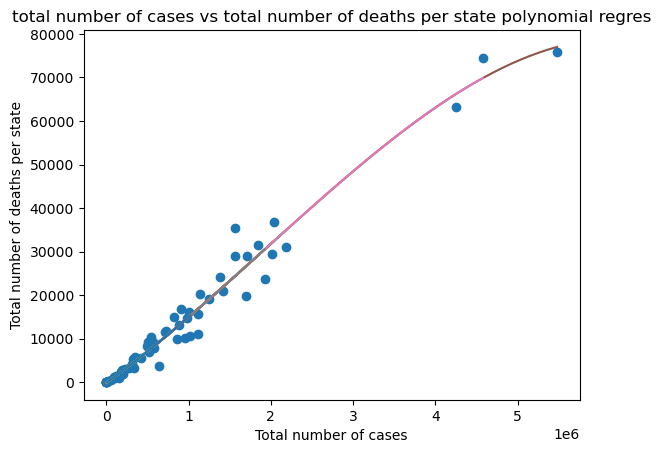

In [388]:
#polynimal regression
#2b
x = df_new.tot_cases
y = df_new.tot_death
coefficients = np.polyfit(x, y, 3)
poly = np.poly1d(coefficients)
    
new_x = np.linspace(x,y)
new_y = poly(new_x)
    
#plt.figure(2)
plt.plot(x, y, "o", new_x, new_y);

plt.xlabel('Total number of cases')
plt.ylabel('Total number of deaths per state')
plt.title('total number of cases vs total number of deaths per state polynomial regres')
plt.show()

In [389]:
#3 Plot the number of new cases per state corresponding to the most recent day, in descending order. 

df_states = df.drop_duplicates(subset=['state']);
df_states.sort_values(by='submission_date',inplace=True);
new = df_states.sort_values(by = 'new_case',ascending=False);

/var/folders/95/l1500c191kj7q22yqnkf0h1r0000gn/T/ipykernel_41233/316360255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states.sort_values(by='submission_date',inplace=True);


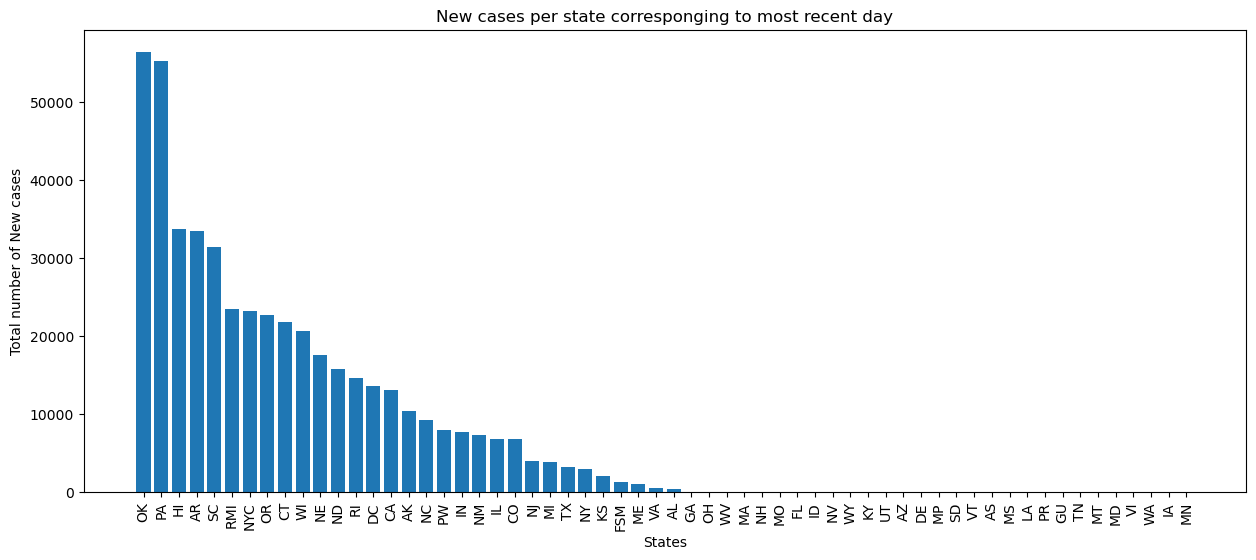

In [390]:
#change figure size
fig = plt.figure(figsize=(15, 6))

#rotate axis labels 
plt.xticks(rotation = 90)
        
#plt.bar(df_states.new_case,df_states.submission_date)
plt.bar(df_states.state,new.new_case)

plt.xlabel('States')
plt.ylabel('Total number of New cases')
plt.title('New cases per state corresponging to most recent day')
plt.show()

In [391]:
#4. Consider data for the following states: Washington, Kentucky, Georgia, and California. 
#a) Plot new cases over time. 
#b) Plot total cases over time.  
#c) Find population count for each state and normalize new cases data and total cases data. 
#   Replot a) and b).  
#d) Discuss the results. 


#Washington, Kentucky, Georgia, and California
states = ['WA', 'KY', 'GA', 'CA']
df_state = df;
df_state.sort_values(by='submission_date',inplace=True)
df_state = df_state[df_state['state'].isin(states)]
time = pd.to_datetime(df.submission_date)

In [397]:
#df_state
#time

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (60060,) and arg 1 with shape (4004,).

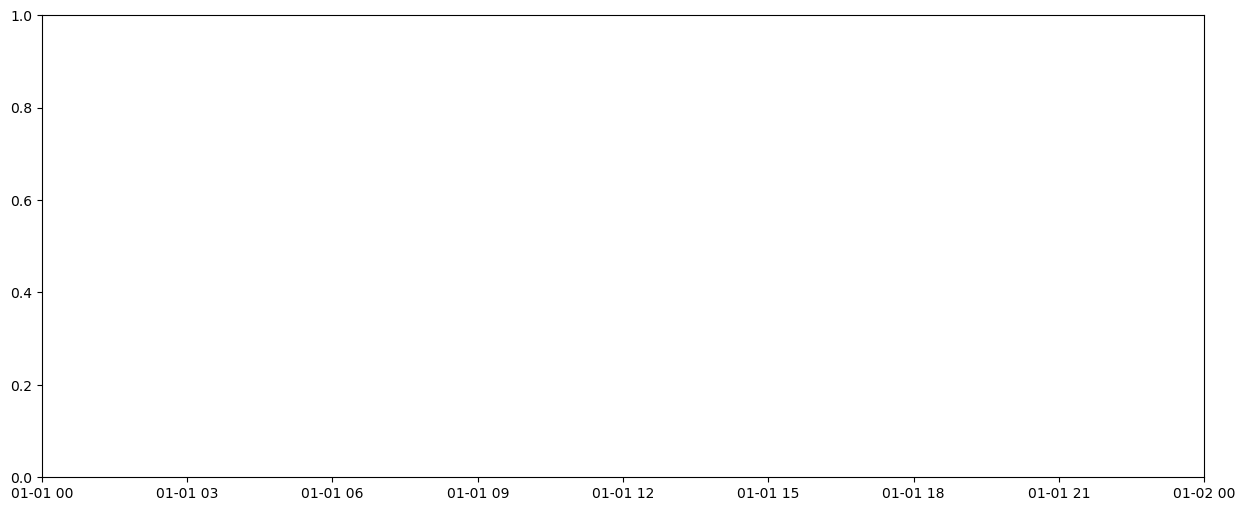

In [395]:
# Group the data by state and date

#new cases over time
grouped = df_state.groupby(['state', 'submission_date']).sum(numeric_only=True).reset_index()

fig = plt.figure(figsize=(15, 6))

# Plot the data for each state
for state in states:
    subset = grouped[grouped['state'] == state]
    plt.bar(time, df_state.new_case, label=state)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()

In [396]:
grouped

,state,submission_date,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,CA,01/01/2021,2292568,2292568.0,0.0,61016,0.0,25802,25802.0,0.0,428,0.0
1,CA,01/01/2022,5477529,5191438.0,286091.0,0,0.0,75847,0.0,0.0,0,0.0
2,CA,01/02/2021,2345909,2345909.0,0.0,53341,0.0,26236,26236.0,0.0,434,0.0
3,CA,01/02/2022,5477529,5191438.0,286091.0,0,0.0,75847,0.0,0.0,0,0.0
4,CA,01/03/2021,2391261,2391261.0,0.0,45352,0.0,26494,26494.0,0.0,258,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3999,WA,12/29/2021,841922,0.0,0.0,4774,900.0,9839,0.0,0.0,17,0.0
4000,WA,12/30/2020,241737,0.0,0.0,1561,175.0,3420,0.0,0.0,51,0.0
4001,WA,12/30/2021,848785,0.0,0.0,6863,550.0,9853,0.0,0.0,14,0.0
4002,WA,12/31/2020,244803,0.0,0.0,3066,259.0,3461,0.0,0.0,41,0.0


In [ ]:
#total cases over time

# Group the data by state and date
grouped_2 = df_state.groupby(['state', 'submission_date'], as_index=False).sum(numeric_only=True).reset_index()
fig = plt.figure(figsize=(15, 6))

# Plot the data for each state
for state in states:
    subset = grouped_2[grouped_2['state'] == state]
    plt.bar(subset['submission_date'], subset['tot_cases'], label=state)
    

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

In [ ]:
#grouped_2

In [408]:
#problem 2 Gene expression differences between normal ovary tissue and ovarian cancer biopsies.

# Load Data
ov_df =  pd.read_csv('ovarian_cancer.csv')
#ov_df

In [409]:
#problem 2, part 1
#plot number of cancer samples and number of normal samples

#3992 genes by 216 samples = 862272 genes measured
#120 cancer, 96 normal
genes = 3992 * 216

status = ov_df['status'].value_counts()
xx = ['cancer','normal']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


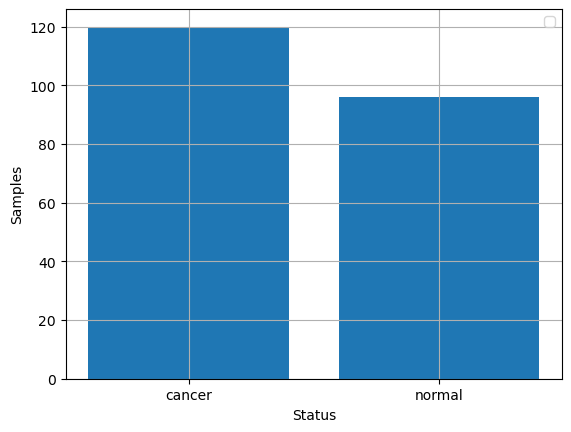

In [412]:
plt.bar(xx,status)

plt.grid()
# Add labels and legend
plt.xlabel('Status')
plt.ylabel('Samples')
plt.legend()
plt.show()

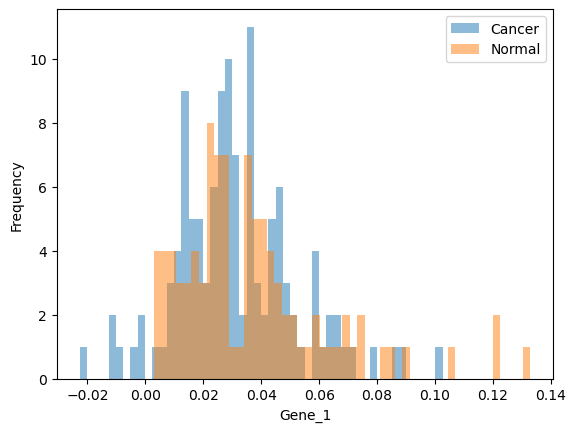

In [398]:
#problem 2, part 2

cancer_data_gene1 = ov_df.gene_1.head(120)
normal_data_gene1 = ov_df.gene_1.tail(96)


# Plot histograms of gene_1 for cancer and normal samples
plt.hist(cancer_data_gene1, bins=50, alpha=0.5, label="Cancer")
plt.hist(normal_data_gene1, bins=50, alpha=0.5, label="Normal")
plt.xlabel("Gene_1")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
#problem 2, part 2

cancer_data_gene3002= ov_df.gene_3002.head(120)
normal_data_gene3002= ov_df.gene_3002.tail(96)


# Plot histograms of gene_1 for cancer and normal samples
plt.hist(cancer_data_gene3002, bins=50, alpha=0.5, label="Cancer")
plt.hist(normal_data_gene3002, bins=50, alpha=0.5, label="Normal")
plt.xlabel("Gene_3002")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
#cancer gene_1 mean
cancer_gene_1mean = np.mean(cancer_data_gene1)
#normal gene_1 mean
normal_gene_1mean = np.mean(normal_data_gene1)

#log2 fold change of gene_1 cancer and normal sample means
change_gene1 = np.log2(cancer_gene_1mean) - np.log2(normal_gene_1mean)

print(change_gene1)

In [ ]:
#cancer gene_3002 mean
cancer_gene_3002mean = np.mean(cancer_data_gene3002)
#normal gene_1 mean
normal_gene_3002mean = np.mean(normal_data_gene3002)

#log2 fold change of gene_3002 cancer and normal sample means
change_gene3002 = np.log2(cancer_gene_3002mean) - np.log2(normal_gene_3002mean)

print(change_gene3002)

In [ ]:
#problem 2) part 2) a)

#a) Use the t-test to determine if there is a significant difference between the means of cancer and normal groups 
#   for gene_1 and gene_3002. State the log2 fold changes and the pvalues for each gene. 

gene_1_t = stats.ttest_ind(cancer_data_gene1,normal_data_gene1)
gene_1fold_change = np.log2(np.mean(cancer_data_gene1) / np.mean(normal_data_gene1))

print(gene_1_t)
print(gene_1fold_change)

In [ ]:
gene_3002_t = stats.ttest_ind(cancer_data_gene3002,normal_data_gene3002)
gene_3002fold_change = np.log2(np.mean(cancer_data_gene3002) / np.mean(normal_data_gene3002))

print(gene_3002_t)
print(gene_3002fold_change)

In [ ]:
#problem 2) part 2) b)
#   Use the Mann-Whitney-Wilcoxon test  to determine if there is a significant difference between the means of 
#   cancer and normal groups for gene_1 and gene_3002. State the log2 fold changes and the pvalues for each gene. 

In [ ]:
#problem2 c
#c) Discuss the results of these tests. Assume that the significance threshold is when pvalue> 0.05.

In [ ]:
#problem 3

#A)

a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6

x = 1
y = 1
xdot = r*x*(1- x/k) - (a*x*y)/(c+x)
ydot = (b*a*x*y)/(c+x) - d*y

print(xdot)
print(ydot)